# Data Imputation - working with missing values <br>

This notebook involves experimenting with various techniques for missing values and testing KNN approach presented in the article of Jason Brownlee PhD: (https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)

## Features:

1. TItle: Horse Colic database<br><br>

2. Source Information<br>
   -- Creators: Mary McLeish & Matt Cecile<br>
          Department of Computer Science
          University of Guelph
          Guelph, Ontario, Canada N1G 2W1
          mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)<br>
   -- Date:     8/6/89<br><br>

3. Past Usage:<br>
   -- Unknown<br><br>

4. Relevant Information:<br>

   -- 2 data files<br>
      -- horse-colic.data: 300 training instances <br>
      -- horse-colic.test: 68 test instances <br><br>
   -- Possible class attributes: 24 (whether lesion is surgical)<br>
     -- others include: 23, 25, 26, and 27 <br><br>
   -- Many Data types: (continuous, discrete, and nominal)<br><br>

5. Number of Instances: 368 (300 for training, 68 for testing)<br><br>

6. Number of attributes: 28<br><br>

7. Attribute Information:<br><br>

  1:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

  2:  Age
          1 = Adult horse
          2 = Young (< 6 months)

  3:  Hospital Number
          - numeric id
          - the case number assigned to the horse
            (may not be unique if the horse is treated > 1 time)

  4:  rectal temperature
          - linear
          - in degrees celsius.
          - An elevated temp may occur due to infection.
          - temperature may be reduced when the animal is in late shock
          - normal temp is 37.8
          - this parameter will usually change as the problem progresses
               eg. may start out normal, then become elevated because of
                   the lesion, passing back through the normal range as the
                   horse goes into shock
  5:  pulse
          - linear
          - the heart rate in beats per minute
          - is a reflection of the heart condition: 30 -40 is normal for adults
          - rare to have a lower than normal rate although athletic horses
            may have a rate of 20-25
          - animals with painful lesions or suffering from circulatory shock
            may have an elevated heart rate

  6:  respiratory rate
          - linear
          - normal rate is 8 to 10
          - usefulness is doubtful due to the great fluctuations

  7:  temperature of extremities
          - a subjective indication of peripheral circulation
          - possible values:
               1 = Normal
               2 = Warm
               3 = Cool
               4 = Cold
          - cool to cold extremities indicate possible shock
          - hot extremities should correlate with an elevated rectal temp.

  8:  peripheral pulse
          - subjective
          - possible values are:
               1 = normal
               2 = increased
               3 = reduced
               4 = absent
          - normal or increased p.p. are indicative of adequate circulation
            while reduced or absent indicate poor perfusion

  9:  mucous membranes
          - a subjective measurement of colour
          - possible values are:
               1 = normal pink
               2 = bright pink
               3 = pale pink
               4 = pale cyanotic
               5 = bright red / injected
               6 = dark cyanotic
          - 1 and 2 probably indicate a normal or slightly increased
            circulation
          - 3 may occur in early shock
          - 4 and 6 are indicative of serious circulatory compromise
          - 5 is more indicative of a septicemia

 10: capillary refill time
          - a clinical judgement. The longer the refill, the poorer the
            circulation
          - possible values
               1 = < 3 seconds
               2 = >= 3 seconds

 11: pain - a subjective judgement of the horse's pain level
          - possible values:
               1 = alert, no pain
               2 = depressed
               3 = intermittent mild pain
               4 = intermittent severe pain
               5 = continuous severe pain
          - should NOT be treated as a ordered or discrete variable!
          - In general, the more painful, the more likely it is to require
            surgery
          - prior treatment of pain may mask the pain level to some extent

 12: peristalsis
          - an indication of the activity in the horse's gut. As the gut
            becomes more distended or the horse becomes more toxic, the
            activity decreases
          - possible values:
               1 = hypermotile
               2 = normal
               3 = hypomotile
               4 = absent

 13: abdominal distension
          - An IMPORTANT parameter.
          - possible values
               1 = none
               2 = slight
               3 = moderate
               4 = severe
          - an animal with abdominal distension is likely to be painful and
            have reduced gut motility.
          - a horse with severe abdominal distension is likely to require
            surgery just tio relieve the pressure

 14: nasogastric tube
          - this refers to any gas coming out of the tube
          - possible values:
               1 = none
               2 = slight
               3 = significant
          - a large gas cap in the stomach is likely to give the horse
            discomfort

 15: nasogastric reflux
          - possible values
               1 = none
               2 = > 1 liter
               3 = < 1 liter
          - the greater amount of reflux, the more likelihood that there is
            some serious obstruction to the fluid passage from the rest of
            the intestine

 16: nasogastric reflux PH
          - linear
          - scale is from 0 to 14 with 7 being neutral
          - normal values are in the 3 to 4 range

 17: rectal examination - feces
          - possible values
               1 = normal
               2 = increased
               3 = decreased
               4 = absent
          - absent feces probably indicates an obstruction

 18: abdomen
          - possible values
               1 = normal
               2 = other
               3 = firm feces in the large intestine
               4 = distended small intestine
               5 = distended large intestine
          - 3 is probably an obstruction caused by a mechanical impaction
            and is normally treated medically
          - 4 and 5 indicate a surgical lesion

 19: packed cell volume
          - linear
          - the # of red cells by volume in the blood
          - normal range is 30 to 50. The level rises as the circulation
            becomes compromised or as the animal becomes dehydrated.

 20: total protein
          - linear
          - normal values lie in the 6-7.5 (gms/dL) range
          - the higher the value the greater the dehydration

 21: abdominocentesis appearance
          - a needle is put in the horse's abdomen and fluid is obtained from
            the abdominal cavity
          - possible values:
               1 = clear
               2 = cloudy
               3 = serosanguinous
          - normal fluid is clear while cloudy or serosanguinous indicates
            a compromised gut

 22: abdomcentesis total protein
          - linear
          - the higher the level of protein the more likely it is to have a
            compromised gut. Values are in gms/dL

 23: outcome
          - what eventually happened to the horse?
          - possible values:
               1 = lived
               2 = died
               3 = was euthanized

 24: surgical lesion?
          - retrospectively, was the problem (lesion) surgical?
          - all cases are either operated upon or autopsied so that
            this value and the lesion type are always known
          - possible values:
               1 = Yes
               2 = No

 25, 26, 27: type of lesion
          - first number is site of lesion
               1 = gastric
               2 = sm intestine
               3 = lg colon
               4 = lg colon and cecum
               5 = cecum
               6 = transverse colon
               7 = retum/descending colon
               8 = uterus
               9 = bladder
               11 = all intestinal sites
               00 = none
          - second number is type
               1 = simple
               2 = strangulation
               3 = inflammation
               4 = other
          - third number is subtype
               1 = mechanical
               2 = paralytic
               0 = n/a
          - fourth number is specific code
               1 = obturation
               2 = intrinsic
               3 = extrinsic
               4 = adynamic
               5 = volvulus/torsion
               6 = intussuption
               7 = thromboembolic
               8 = hernia
               9 = lipoma/slenic incarceration
               10 = displacement
               0 = n/a
 28: cp_data
          - is pathology data present for this case?
               1 = Yes
               2 = No
          - this variable is of no significance since pathology data
            is not included or collected for these cases

8. Missing values: 30% of the values are missing

## Basic libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data import:

In [2]:
df = pd.read_csv('horse-colic.csv', header=None, na_values='?')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [4]:
df.isnull().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64

## Missing data detailed:

In [5]:
# summarize the number of rows with missing values for each column
percentage_dict = dict()
for i in range(df.shape[1]):
    
    # count number of rows with missing values
    missing_values = df[[i]].isnull().sum()
    percentage = missing_values / df.shape[0] * 100
    percentage = float(np.round(percentage,2))
    
    percentage_dict[i] = percentage
    
    print(f'Column {int(i)}:  {percentage}%  missing.')

Column 0:  0.33%  missing.
Column 1:  0.0%  missing.
Column 2:  0.0%  missing.
Column 3:  20.0%  missing.
Column 4:  8.0%  missing.
Column 5:  19.33%  missing.
Column 6:  18.67%  missing.
Column 7:  23.0%  missing.
Column 8:  15.67%  missing.
Column 9:  10.67%  missing.
Column 10:  18.33%  missing.
Column 11:  14.67%  missing.
Column 12:  18.67%  missing.
Column 13:  34.67%  missing.
Column 14:  35.33%  missing.
Column 15:  82.33%  missing.
Column 16:  34.0%  missing.
Column 17:  39.33%  missing.
Column 18:  9.67%  missing.
Column 19:  11.0%  missing.
Column 20:  55.0%  missing.
Column 21:  66.0%  missing.
Column 22:  0.33%  missing.
Column 23:  0.0%  missing.
Column 24:  0.0%  missing.
Column 25:  0.0%  missing.
Column 26:  0.0%  missing.
Column 27:  0.0%  missing.


## Missing data:

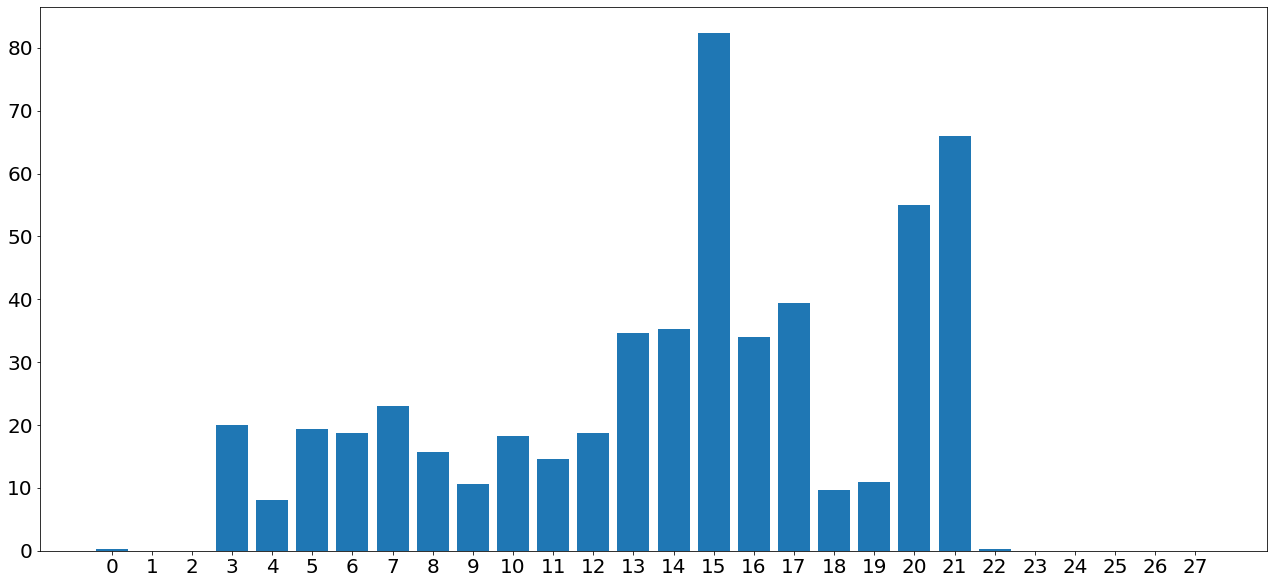

In [6]:
plt.figure(figsize=(22,10))
#plt.style.use('dark_background')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

names = list(percentage_dict.keys())
values = list(percentage_dict.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(percentage_dict)),values,tick_label=names)

plt.show()

## Dependent and independent variable:

In [7]:
X = df.drop([23], axis=1)
y = df[[23]]

##  Train-test split:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Summary of missing values in total:

In [9]:
from numpy import isnan

all_missing_data_X = isnan(X).sum().sum()
all_missing_data_y = isnan(y).sum().sum()

print(f'All missing values in X: {all_missing_data_X}.')
print(f'All missing values in y: {all_missing_data_y}.')

All missing values in X: 1605.
All missing values in y: 0.


## KNNImputer Data Transform

1. Euclidean distance will not include NaN values.
2. Default n_neighbors = 5
3. Distance measure can be weighed proportional to the distance between instances

In [10]:
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [11]:
# fit and transform on the dataset
Xtrans = imputer.fit_transform(X)

## Re-check missing values:

In [12]:
all_missing_data_X = isnan(Xtrans).sum().sum()

print(f'Now, all missing values in X: {all_missing_data_X}.')

Now, all missing values in X: 0.


#### Old X:

In [13]:
X

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,5.0,45.0,8.4,NaN,NaN,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,2.0,50.0,85.0,2.0,2.0,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,NaN,NaN,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,NaN,48.0,7.2,3.0,5.3,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,74.0,7.4,NaN,NaN,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,5.0,55.0,65.0,NaN,NaN,3.0,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,NaN,3.0,3.3,3.0,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.8,NaN,NaN,2.0,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.0,3.0,3.4,1.0,2208,0,0,1


#### Imputed X. Note new columns names (23 needs to be 24 etc.)

In [14]:
pd.DataFrame(Xtrans)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2.0,1.0,530101.0,38.50,66.0,28.0,3.0,3.0,2.2,2.0,...,5.0,45.0,8.40,2.2,3.96,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.20,88.0,20.0,3.0,2.0,4.0,1.0,...,2.0,50.0,85.00,2.0,2.00,3.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.30,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.70,2.2,5.18,1.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.10,164.0,84.0,4.0,1.0,6.0,2.0,...,3.2,48.0,7.20,3.0,5.30,2.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.30,104.0,35.0,3.0,2.6,6.0,2.0,...,4.2,74.0,7.40,2.4,2.80,2.0,4300.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,533886.0,38.18,120.0,70.0,4.0,3.2,4.0,2.0,...,5.0,55.0,65.00,2.0,1.60,3.0,3205.0,0.0,0.0,2.0
296,2.0,1.0,527702.0,37.20,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,7.52,3.0,3.30,3.0,2208.0,0.0,0.0,1.0
297,1.0,1.0,529386.0,37.50,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.80,1.8,5.44,2.0,3205.0,0.0,0.0,2.0
298,1.0,1.0,530612.0,36.50,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.00,3.0,3.40,1.0,2208.0,0.0,0.0,1.0


## Model evaluation:

In [15]:
# define modeling pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = RandomForestClassifier()
knn_imputer = KNNImputer()

pipeline = Pipeline(steps=[('imputer', knn_imputer), ('model', rf_model)])

## Repeated Stratified K-fold Cross Validation <br>

The estimate of model performance via k-fold cross-validation can be noisy.<br><br>

Repeated k-fold cross-validation: do the process multiple times and report the mean performance across all folds and all repeats. <br><br>

Stratified: The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. 

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold

# repeats Stratified K-Fold n times with different randomization in each repetition
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [17]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [18]:
print(f'Mean Accuracy: {np.round(np.mean(scores),2)}, std dev: {np.round(np.std(scores),2)}.')

Mean Accuracy: 0.87, std dev: 0.06.


In [19]:
scores.shape

(30,)

## Exploring the value for K:

In [20]:
range(10)

range(0, 10)

In [21]:
# evaluate each strategy on the dataset
results = list()
k_values = [i for i in [1,3,5,7,9,15,18,21]]

for k in k_values:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=k)), ('model', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print(f'Mean Accuracy: {np.round(np.mean(scores),2)}, std dev: {np.round(np.std(scores),2)}.')

Mean Accuracy: 0.86, std dev: 0.06.
Mean Accuracy: 0.86, std dev: 0.06.
Mean Accuracy: 0.87, std dev: 0.05.
Mean Accuracy: 0.86, std dev: 0.06.
Mean Accuracy: 0.86, std dev: 0.05.
Mean Accuracy: 0.86, std dev: 0.05.
Mean Accuracy: 0.86, std dev: 0.05.
Mean Accuracy: 0.86, std dev: 0.06.


In [22]:
pd.DataFrame(np.transpose(results))

,0,1,2,3,4,5,6,7
0,0.866667,0.866667,0.900000,0.900000,0.866667,0.866667,0.900000,0.900000
1,0.833333,0.833333,0.833333,0.833333,0.800000,0.800000,0.800000,0.800000
2,0.866667,0.833333,0.866667,0.866667,0.833333,0.900000,0.866667,0.800000
3,0.833333,0.833333,0.833333,0.800000,0.833333,0.800000,0.800000,0.800000
4,0.900000,0.933333,0.933333,0.933333,0.933333,0.933333,0.900000,0.933333
5,0.866667,0.900000,0.900000,0.900000,0.933333,0.900000,0.933333,0.900000
6,0.900000,0.933333,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
7,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
8,0.766667,0.733333,0.766667,0.800000,0.766667,0.766667,0.766667,0.766667
9,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


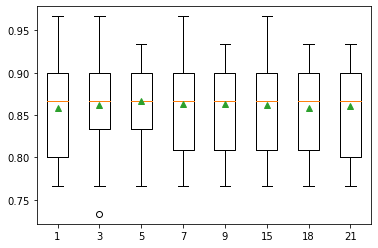

In [23]:
# plot model performance for comparison
plt.boxplot(results, labels=k_values, showmeans=True)
plt.show()